In [1]:
pip install pandas matplotlib seaborn


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('netflix_titles.csv')

# View top rows
df.head()

# Check data types and null values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [3]:
# Clean missing values
df['country'] = df['country'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Not Specified')

# Strip and convert dates
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [4]:
df['date_added'].isna().sum()


np.int64(10)

<Axes: title={'center': 'Content Type Distribution'}, xlabel='type'>

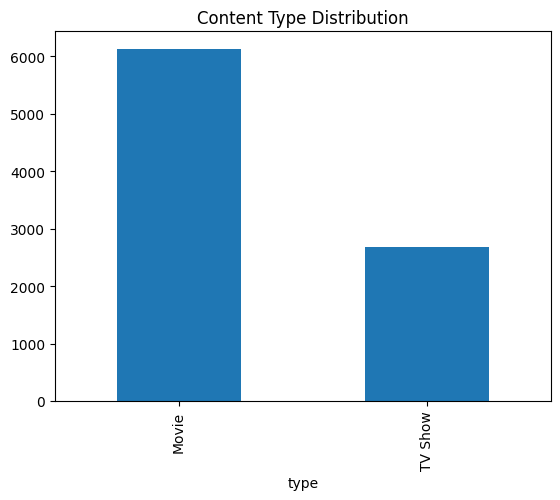

In [5]:
df['type'].value_counts().plot(kind='bar', title='Content Type Distribution')


<Axes: title={'center': 'Content Added Per Year'}, xlabel='year_added'>

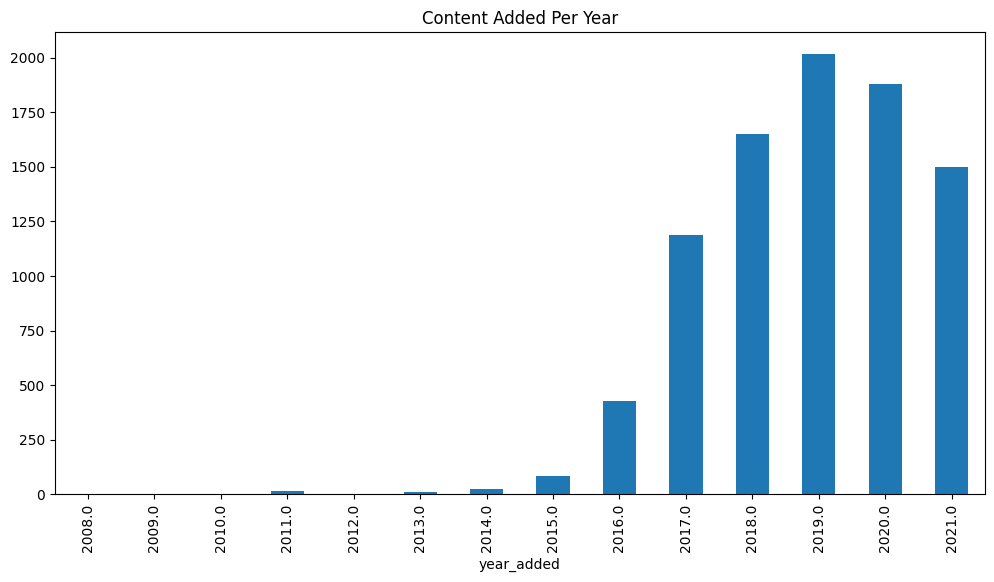

In [6]:
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), title='Content Added Per Year')


<Axes: title={'center': 'Top 10 Countries with Most Content'}, ylabel='country'>

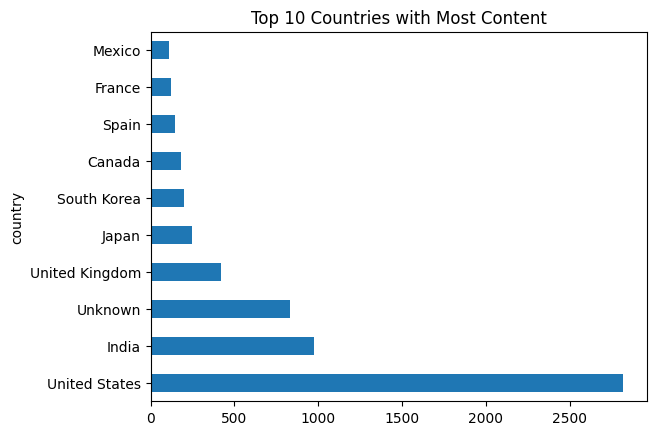

In [7]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', title='Top 10 Countries with Most Content')


<Axes: title={'center': 'Top Genres'}, xlabel='listed_in'>

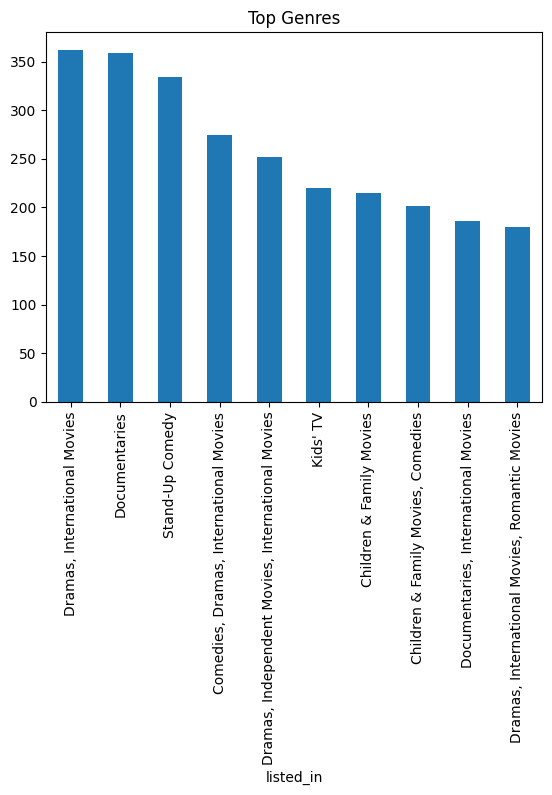

In [8]:
df['listed_in'].value_counts().head(10).plot(kind='bar', title='Top Genres')


<Axes: xlabel='rating'>

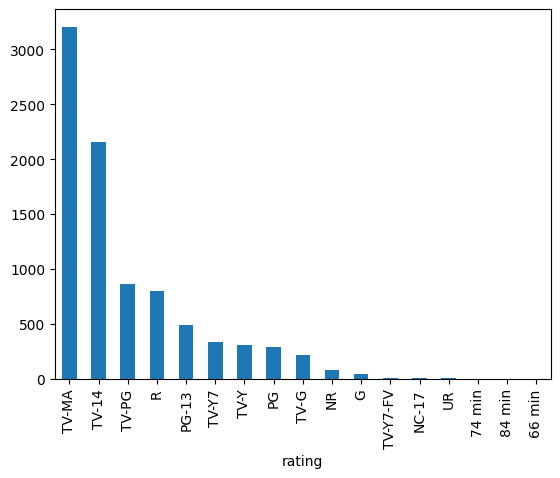

In [15]:
df['rating'].value_counts().plot(kind='bar')


In [16]:
df['director'].value_counts().head(10)
df['cast'].str.split(', ').explode().value_counts().head(10)


,count
cast,
Not Specified,825
Anupam Kher,43
Shah Rukh Khan,35
Julie Tejwani,33
Naseeruddin Shah,32
Takahiro Sakurai,32
Rupa Bhimani,31
Om Puri,30
Akshay Kumar,30


/tmp/ipython-input-1419057435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)


"movies['duration'].plot(kind='hist', bins=20, title='Movie Duration Distribution')\nplt.xlabel('Duration (minutes)')\nplt.show()"

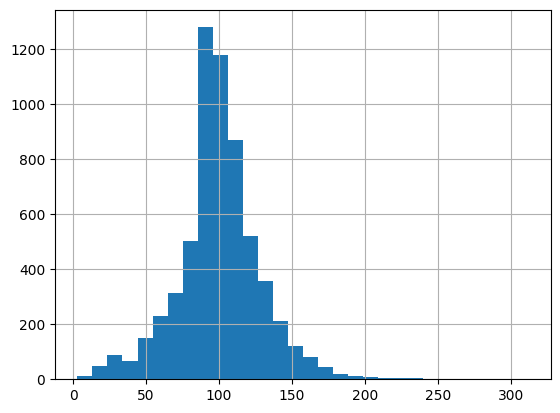

In [14]:
import matplotlib.pyplot as plt
movies = df[df['type'] == 'Movie']
movies['duration'] = movies['duration'].str.replace(' min', '').astype(float)
movies['duration'].hist(bins=30)

'''movies['duration'].plot(kind='hist', bins=20, title='Movie Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.show()'''

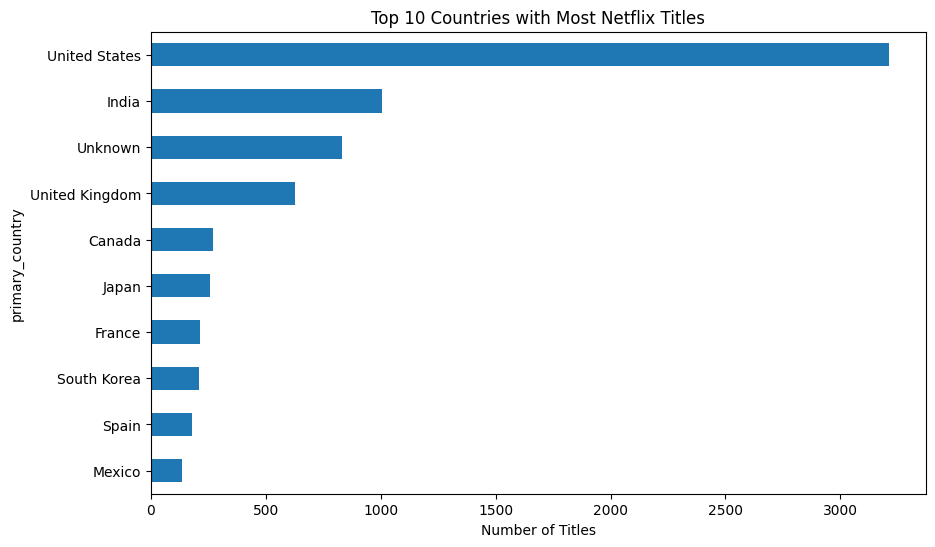

In [17]:
# Drop missing values
df_country = df.dropna(subset=['country'])

# Extract first country
df_country['primary_country'] = df_country['country'].apply(lambda x: x.split(',')[0].strip())

# Top 10 countries
top_countries = df_country['primary_country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
top_countries.plot(kind='barh')
plt.xlabel('Number of Titles')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.gca().invert_yaxis()
plt.show()


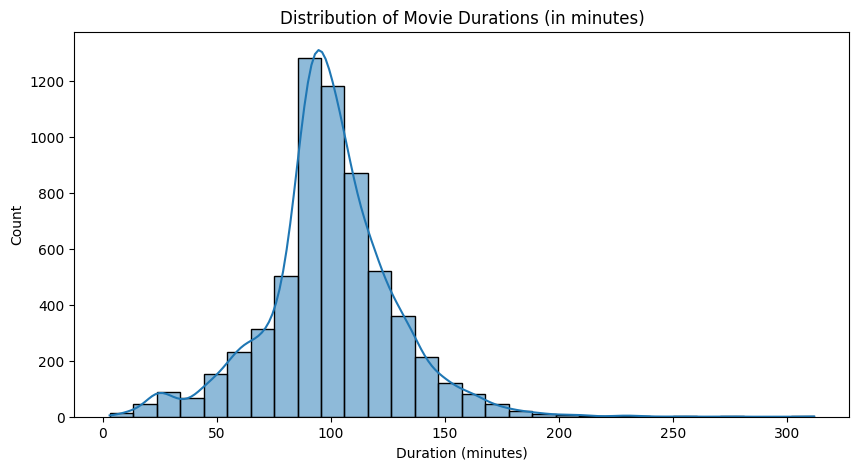

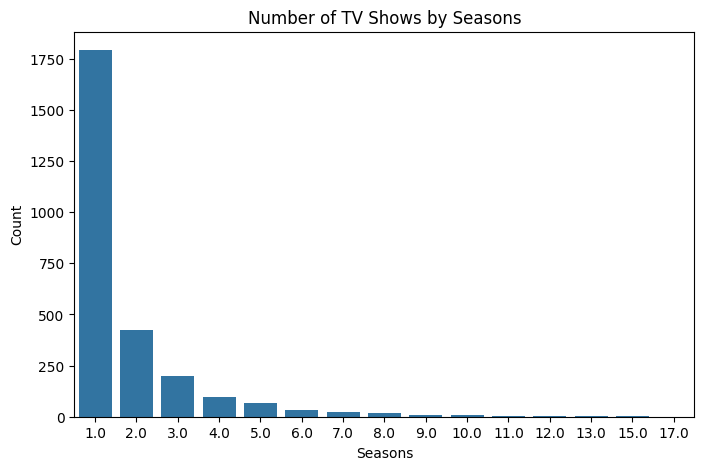

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot movie durations
plt.figure(figsize=(10, 5))
sns.histplot(movies['duration_int'], bins=30, kde=True)
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# For movies
movies = df[df['type'] == 'Movie'].copy()
movies['duration_int'] = movies['duration'].str.extract('(\d+)').astype(float)

# For TV shows
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

'''# Plot movie durations
plt.figure(figsize=(10, 5))
sns.histplot(movies['duration_int'], bins=30, kde=True)
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()'''

# Plot TV show seasons
plt.figure(figsize=(8, 5))
sns.countplot(x='seasons', data=tv_shows)
plt.title('Number of TV Shows by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()


In [ ]:
print("Shortest movie:\n", movies.sort_values('duration').head(1))
print("Longest movie:\n", movies.sort_values('duration', ascending=False).head(1))


Shortest movie:
      show_id   type   title                           director           cast  \
3777   s3778  Movie  Silent  Limbert Fabian, Brandon Oldenburg  Not Specified   

            country date_added  release_year rating  duration  \
3777  United States 2019-06-04          2014   TV-Y       3.0   

                                       listed_in  \
3777  Children & Family Movies, Sci-Fi & Fantasy   

                                            description  year_added  
3777  "Silent" is an animated short film created by ...      2019.0  
Longest movie:
      show_id   type                       title director  \
4253   s4254  Movie  Black Mirror: Bandersnatch      NaN   

                                                   cast        country  \
4253  Fionn Whitehead, Will Poulter, Craig Parkinson...  United States   

     date_added  release_year rating  duration  \
4253 2018-12-28          2018  TV-MA     312.0   

                                           listed_in  \
4

In [ ]:
movies.groupby('country')['duration'].mean().sort_values(ascending=False).head(10)


,duration
country,
"United Kingdom, United States, Japan",208.0
"United States, United Kingdom, Morocco",205.0
"United States, Italy, United Kingdom, Liechtenstein",200.0
"New Zealand, United States",190.0
"Romania, France, Switzerland, Germany",186.0
"France, Belgium, Spain",180.0
"Germany, United States, Hong Kong, Singapore",172.0
"India, Soviet Union",161.5
"United Kingdom, United States, Morocco",161.0


In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [21]:
df = pd.read_csv("netflix_titles.csv")

# Fill NaNs in description and listed_in
df['description'] = df['description'].fillna('')
df['listed_in'] = df['listed_in'].fillna('')


In [ ]:
df['combined'] = df['description'] + ' ' + df['listed_in']


In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined'])


In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [ ]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()


In [ ]:
def recommend(title, cosine_sim=cosine_sim):
    idx = indices.get(title)
    if idx is None:
        return ["Movie not found."]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 excluding itself
    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices].tolist()


In [ ]:
recommend("Narcos")


['Miss Dynamite',
 'Narcos: Mexico',
 'El Cartel 2',
 'El Chapo',
 'Ganglands',
 'El final del paraíso',
 'Cocaine Cowboys: The Kings of Miami',
 'Historia de un clan',
 'Sin senos no hay paraíso',
 'Top Boy']

In [ ]:
recommend("Thriller")

['No Entry',
 'Bean: The Ultimate Disaster Movie',
 'Natural Selection',
 'Return of the Prodigal Son',
 'Rab Se Sohna Isshq',
 'Nneka The Pretty Serpent',
 'Balu Mahi',
 'House Party 2',
 'Prank Encounters',
 'Loyiso Gola: Unlearning']

In [ ]:
recommend("Romance")

['Movie not found.']

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load data
df = pd.read_csv("netflix_titles.csv")

# Fill NaNs with empty string
for col in ['director', 'cast', 'listed_in', 'description']:
    df[col] = df[col].fillna('')

# Combine features into one text column
df['combined_features'] = df['title'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['listed_in'] + ' ' + df['description']


In [ ]:
# TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])

# Cosine similarity
similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
# TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])

# Cosine similarity
similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
def recommend(title, similarity=similarity, df=df):
    title = title.lower()
    if title not in df['title'].str.lower().values:
        return "Not found:))"

    idx = df[df['title'].str.lower() == title].index[0]
    scores = list(enumerate(similarity[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    top_scores = scores[1:6]  # Skip the first (it's the same show)

    recommendations = []
    for i in top_scores:
        recommendations.append(df.iloc[i[0]].title)
    return recommendations


In [ ]:
recommend("Breaking Bad")


['Better Call Saul',
 'El Camino: A Breaking Bad Movie',
 'The Show',
 'W/ Bob & David',
 'The Lincoln Lawyer']

In [ ]:
recommend("romance")

'Not found:))'

In [ ]:
recommend("TV dramas")

'Not found:))'

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv("netflix_titles.csv")

# Fill NaNs in relevant columns
df['description'] = df['description'].fillna('')
df['listed_in'] = df['listed_in'].fillna('')
df['combined'] = df['description'] + ' ' + df['listed_in']

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create reverse map (title -> index)
indices = pd.Series(df.index, index=df['title'].str.lower()).drop_duplicates()

# Recommender function
def recommend(title, num_results=10):
    title = title.lower()

    # If input is not a title but a genre, match it to rows that *contain* the term
    if title not in indices:
        print(f"'{title}' not found as title. Searching in genres...")
        genre_matches = df[df['listed_in'].str.lower().str.contains(title)]

        if genre_matches.empty:
            print("No matches found in genres either.")
            return []

        idx_list = genre_matches.index.tolist()
        sim_scores = cosine_sim[idx_list]

        # Average similarity of those genres with all others
        avg_sim = sim_scores.mean(axis=0)
        similar_indices = avg_sim.argsort()[::-1][1:num_results+1]
        return df['title'].iloc[similar_indices].tolist()

    # If title is found
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_results+1]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices].tolist()


In [ ]:
recommend("drama")

'drama' not found as title. Searching in genres...


["Autumn's Concerto",
 'Dérè: An African Tale',
 'Sin senos no hay paraíso',
 'Dear My Friends',
 'Single Ladies Senior',
 'Fatal Destiny',
 'Familiar Wife',
 'The Legend of White Snake',
 'Club Friday The Series 7',
 'Spice Up']

In [ ]:
recommend("Stranger Things")

['Rowdy Rathore',
 'The OA',
 'Sakho & Mangane',
 'Star-Crossed',
 'Manifest',
 'Anjaan: Special Crimes Unit',
 'Haven',
 'Safe Haven',
 'Freaks',
 'The Messengers']

In [ ]:
df.to_csv('netflix_cleaned.csv', index=False)


In [ ]:
df.to_csv('netflix_cleaned.csv', index=False)

# Step 2: Download it to your local machine
from google.colab import files
files.download('netflix_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>